##Importing the prerequisite libraries

In [1]:
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
pd.__version__

'1.3.5'

Loading the data from https://www.kaggle.com/gspmoreira/articles-sharing-reading-from-cit-deskdrop?select=shared_articles.csv

In [5]:
df = pd.read_csv(r'/content/shared_articles.csv')
df.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


##Basic EDA to identify useful features

In [6]:
df['eventType'].value_counts()


CONTENT SHARED     3047
CONTENT REMOVED      75
Name: eventType, dtype: int64

In [7]:
df = df[df['eventType']=='CONTENT SHARED']
df.shape

(3047, 13)

In [8]:
df['contentId'].head()

1   -4110354420726924665
2   -7292285110016212249
3   -6151852268067518688
4    2448026894306402386
5   -2826566343807132236
Name: contentId, dtype: int64

In [9]:
df['authorPersonId'].head()

1    4340306774493623681
2    4340306774493623681
3    3891637997717104548
4    4340306774493623681
5    4340306774493623681
Name: authorPersonId, dtype: int64

In [10]:
len(df['authorPersonId'].unique())

252

In [11]:
df['authorSessionId'].head()

1    8940341205206233829
2    8940341205206233829
3   -1457532940883382585
4    8940341205206233829
5    8940341205206233829
Name: authorSessionId, dtype: int64

In [12]:
# Browser used by the user to view the acticle
df['authorUserAgent'].tail(5)

3117    Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...
3118    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...
3119    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0...
3120    Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
3121    Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
Name: authorUserAgent, dtype: object

In [13]:
len(df['authorUserAgent'].unique())

115

In [16]:
print(df['authorRegion'].tail(5))
print(len(df['authorRegion'].unique()))
print(df['authorRegion'].isnull().sum(axis=0))

3117    SP
3118    GA
3119    SP
3120    MG
3121    SP
Name: authorRegion, dtype: object
20
2378


In [18]:
print(df['authorCountry'].tail(5))
print(df['authorCountry'].unique())
print(df['authorCountry'].isna().sum(axis=0))


3117    BR
3118    US
3119    BR
3120    BR
3121    BR
Name: authorCountry, dtype: object
[nan 'BR' 'CA' 'US' 'AU' 'PT']
2378


In [20]:
print(df['contentType'].unique())
print(df['contentType'].isnull().sum(axis=0))

['HTML' 'RICH' 'VIDEO']
0


In [21]:
print(df['url'].head(5))
print(df['url'].isnull().sum(axis=0))
print(df['url'].isna().sum(axis=0))

1    http://www.nytimes.com/2016/03/28/business/dea...
2    http://cointelegraph.com/news/bitcoin-future-w...
3    https://cloudplatform.googleblog.com/2016/03/G...
4    https://bitcoinmagazine.com/articles/ibm-wants...
5    http://www.coindesk.com/ieee-blockchain-oxford...
Name: url, dtype: object
0
0


In [22]:
print(df['title'].head(5))
print(df['title'].isnull().sum(axis=0))
print(df['title'].isna().sum(axis=0))

1    Ethereum, a Virtual Currency, Enables Transact...
2    Bitcoin Future: When GBPcoin of Branson Wins O...
3                         Google Data Center 360° Tour
4    IBM Wants to "Evolve the Internet" With Blockc...
5    IEEE to Talk Blockchain at Cloud Computing Oxf...
Name: title, dtype: object
0
0


In [23]:
print(df['text'].head(5))
print(df['text'].isnull().sum(axis=0))
print(df['text'].isna().sum(axis=0))

1    All of this work is still very early. The firs...
2    The alarm clock wakes me at 8:00 with stream o...
3    We're excited to share the Google Data Center ...
4    The Aite Group projects the blockchain market ...
5    One of the largest and oldest organizations fo...
Name: text, dtype: object
0
0


In [24]:
print(df['lang'].unique())
print(df['lang'].isnull().sum(axis=0))
print(df['lang'].isna().sum(axis=0))

['en' 'pt' 'es' 'la' 'ja']
0
0


In [41]:
df['lang'].value_counts()

en    2211
pt     829
la       3
es       2
ja       2
Name: lang, dtype: int64

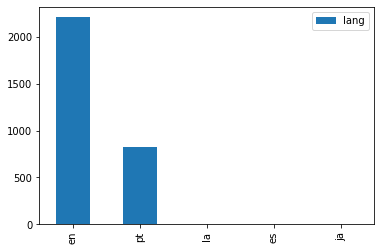

In [27]:
pd.DataFrame(df['lang'].value_counts()).plot(kind='bar')

English and portuguese are the two most common languages and the articles in the rest of the languages are negligible.

In [28]:
# Selecting articles written in english
articles_df = df[df['lang'] == 'en']
print(articles_df.shape)

(2211, 13)


In [29]:
articles_df = pd.DataFrame(articles_df, columns=['contentId', 'authorPersonId', 'content', 'title', 'text'])

In [33]:
# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(articles_df['text'])

In [35]:
# Output the shape of tfidf_matrix
print(tfidf_matrix.shape)
# print(tfidf.get_stop_words().pop())

# Array mapping from feature integer indices to feature name.
print(tfidf.get_feature_names_out()[5000:5010])

(2211, 45496)
['banter' 'baptista' 'baptiste' 'baptized' 'bar' 'barack' 'barani'
 'baratheon' 'barauskas' 'barb']


In [36]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix, True)
display(cosine_sim.shape)
display(cosine_sim)

(2211, 2211)

array([[1.        , 0.02842053, 0.01414884, ..., 0.04717028, 0.08436331,
        0.01859574],
       [0.02842053, 1.        , 0.02096081, ..., 0.0256655 , 0.03187741,
        0.01120014],
       [0.01414884, 0.02096081, 1.        , ..., 0.02092281, 0.04240744,
        0.        ],
       ...,
       [0.04717028, 0.0256655 , 0.02092281, ..., 1.        , 0.05457163,
        0.07645089],
       [0.08436331, 0.03187741, 0.04240744, ..., 0.05457163, 1.        ,
        0.03965418],
       [0.01859574, 0.01120014, 0.        , ..., 0.07645089, 0.03965418,
        1.        ]])

In [37]:
# Reset index of main DataFrame and construct reverse mapping as before
metadata = articles_df.reset_index()
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()
display(indices[:10])

title
Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's                                          0
Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump                                               1
Google Data Center 360° Tour                                                                                     2
IBM Wants to "Evolve the Internet" With Blockchain Technology                                                    3
IEEE to Talk Blockchain at Cloud Computing Oxford-Con - CoinDesk                                                 4
Banks Need To Collaborate With Bitcoin and Fintech Developers                                                    5
Blockchain Technology Could Put Bank Auditors Out of Work                                                        6
Why Decentralized Conglomerates Will Scale Better than Bitcoin - Interview with OpenLedger CEO - Bitcoin News    7
The Rise And Growth of Ethereum Gets Mainstream Coverage                  

In [38]:
# Function that takes in article title as input and outputs most similar articles
def get_recommendations(title, indices, cosine_sim, data):
    # Get the index of the article that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all articles with that article
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the articles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar articles
    sim_scores = sim_scores[1:11]

    # Get the article indices
    article_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar articles
    return data['title'].iloc[article_indices]

In [40]:
print(get_recommendations('Google Data Center 360° Tour', indices, cosine_sim
                            , metadata))

121     Google shares data center security and design ...
714     YouTube's New Messenger Means You'll Never Hav...
538                          This year's Founders' Letter
207     Google Cloud Platform: The smart person's guid...
439     Top 5 GCP NEXT breakout sessions on YouTube (s...
699     Google I/O 2016 Preview: A Chrome/Android merg...
2059    [Tools] How to Record your Desktop Screen with...
748     Google I/O 2016 preview: Android N, Android VR...
756     Here's proof that Google is getting serious ab...
751     Google I/O 2016 Preview: Machine Learning, Vir...
Name: title, dtype: object
